앞서 언급했듯이, Test set과 Train Set은 직접 크롤링하여 데이터를 얻기 어려워 만들어진 자료를 기반으로 딥러닝을 구현할 예정이다. 이 데이터는 네이버 영화 리뷰 데이터를 모아 긍정적 리뷰이면 1, 부정적 리뷰면 0으로 판별한 데이터 셋이다. 

# 자연어 처리를 통해 딥러닝 환경 구현

STEP 1 딥러닝에 사용할 데이터 다운로드 및 확인

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#훈련 데이터 셋를 확인
pd.read_csv('ratings_train.txt', delimiter = '\t')

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [16]:
pd.read_csv('ratings_test.txt', delimiter = '\t') #테스트 데이터셋 확인

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


STEP2 데이터를 정리하기 

In [17]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [18]:
train_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
train_data['document'].replace('', np.nan, inplace=True) #빈 값을 NULL로 변경 
train_data = train_data.dropna(how = 'any') 
print('전처리 후 트레이닝용 샘플의 개수 :',len(train_data))


전처리 후 트레이닝용 샘플의 개수 : 146182


In [19]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48995


In [20]:
import json
import os
from konlpy.tag import Okt #강의 시간에 배운 konlpy를 이용해 불용어를 처리한다.

okt = Okt() 
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

X_train = []
for sentence in train_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)
    
print(X_train[:3])


[['아', '더빙', '..', '진짜', '짜증나다', '목소리'], ['흠', '...', '포스터', '보고', '초딩', '영화', '줄', '....', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [21]:
X_test = []
for sentence in test_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [23]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 49586
등장 빈도가 2번 이하인 희귀 단어의 수: 28787
단어 집합에서 희귀 단어의 비율: 58.054692856854764
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.909214704259857


In [24]:
vocab_size = total_cnt - rare_cnt + 2

In [25]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [26]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

빈도 수가 적은 단어들을 제거했으므로 그 부분은 공백이 됬음을 의미함. 이 공백을 다시 제거해 딥러닝을 진행할 예정

In [27]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
#길이가 0인 것들의 인덱스를 받아온다.(제거를 위함)

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

146180
146180


편리한 연산을 위해 서로 다른 길이의 샘플들의 길이를 맞추는 작업이 필요하다.

리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 12.599206457791764


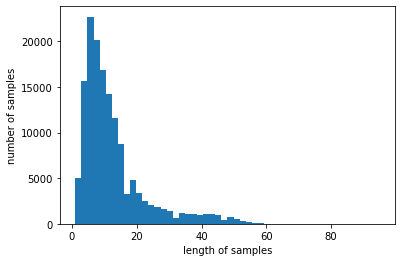

In [28]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
        
below_threshold_len(max_len, X_train)

NameError: name 'max_len' is not defined

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)
#이 결과는 max_len이 30이 되면 대부분을 포함함을 의미

모든 샘플의 길이를 30으로 맞춘다

In [ ]:
X_train = pad_sequences(X_train, maxlen = 30)
X_test = pad_sequences(X_test, maxlen = 30)